# Lab 4 - analysis of Bitcoin market price and volume of tweets about Bitcoin.

In [116]:
import pandas as pd
import numpy as np
import statistics as stat
from matplotlib import pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

1. Import dataset
https://www.kaggle.com/jaimebadiola/bitcoin-tweets-and-price?select=df_Final.csv

In [141]:
df = pd.read_csv('btc.csv', sep=';')

In [142]:
df.head()

,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),Volume (Currency)
0,2017-08-01 00:00:00,0.082893,1027.0,139.0,347.0,397.0,-0.516620,0.417882,695.0,144.0,2855.81,2863.06,2823.00,2825.92,184.02,"522951,00"
1,2017-08-01 01:00:00,0.053160,778.0,111.0,193.0,320.0,-0.423402,0.415385,493.0,154.0,2823.01,2860.02,2821.01,2853.38,77.3,219605.16
2,2017-08-01 02:00:00,0.124251,836.0,89.0,273.0,264.0,-0.440938,0.428661,510.0,210.0,2846.27,2858.04,2837.31,2841.60,135.83,386739.15
3,2017-08-01 03:00:00,-0.021036,984.0,250.0,236.0,314.0,-0.441173,0.396034,683.0,184.0,2841.84,2863.88,2837.73,2862.93,143.2,408360.03
4,2017-08-01 04:00:00,0.055437,751.0,114.0,195.0,305.0,-0.414978,0.417159,517.0,137.0,2862.92,2876.00,2848.11,2874.99,222.53,637045.88


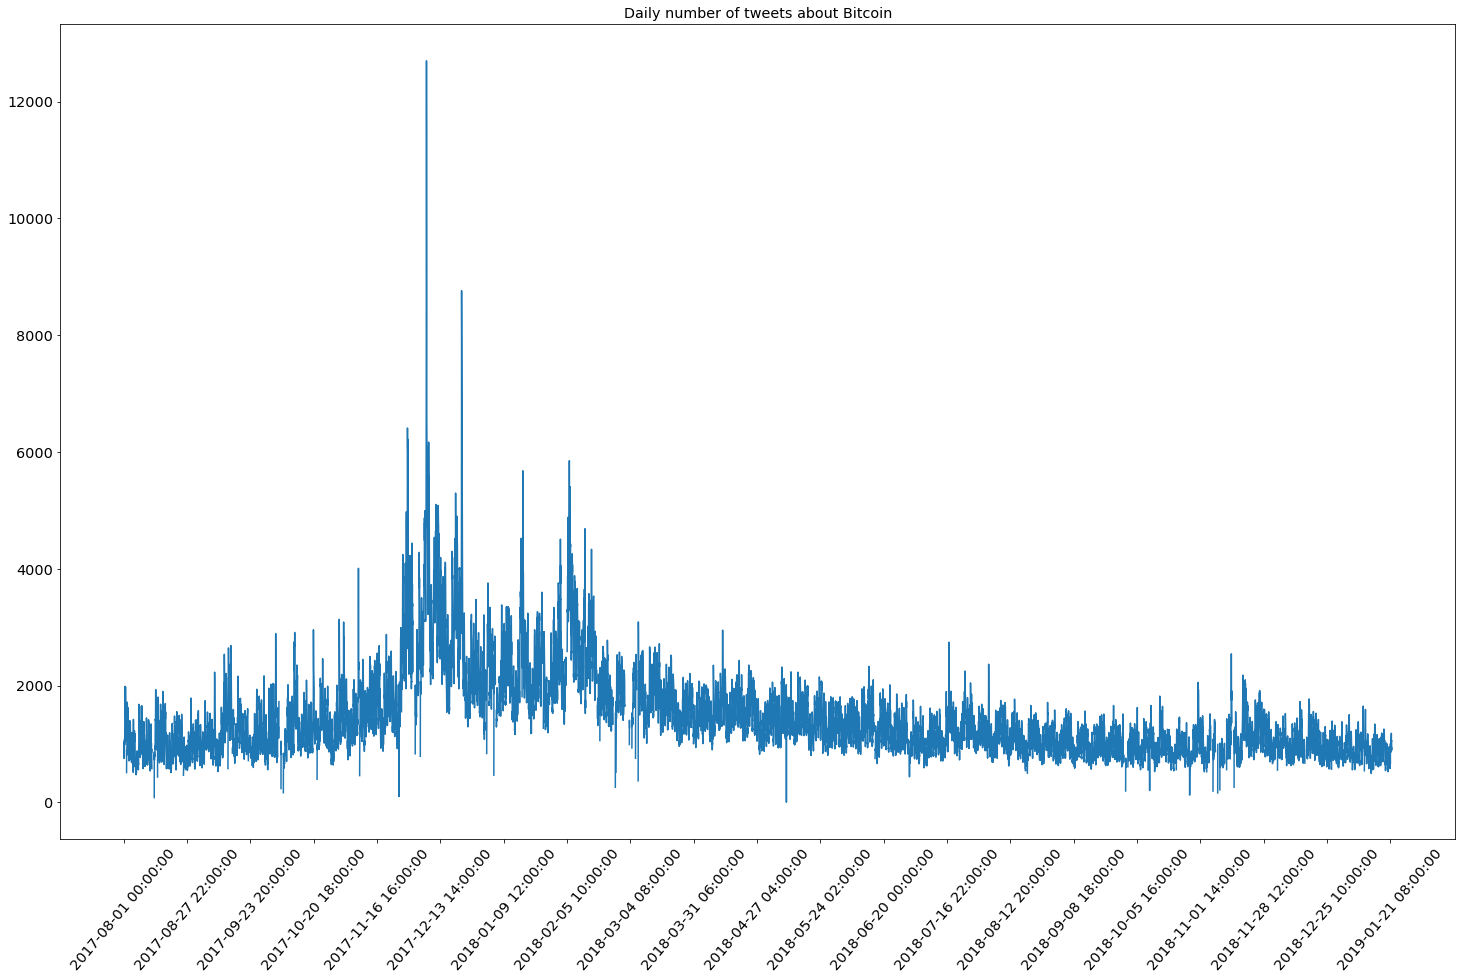

In [143]:
#df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')
step = int(len(df.index) / 20)
#print(df['Date'][0:-1:step])
plt.plot(df['Date'], df['Total Volume of Tweets'])
plt.title('Daily number of tweets about Bitcoin')
plt.xticks(df['Date'][0:-1:step], rotation=50)
plt.show()

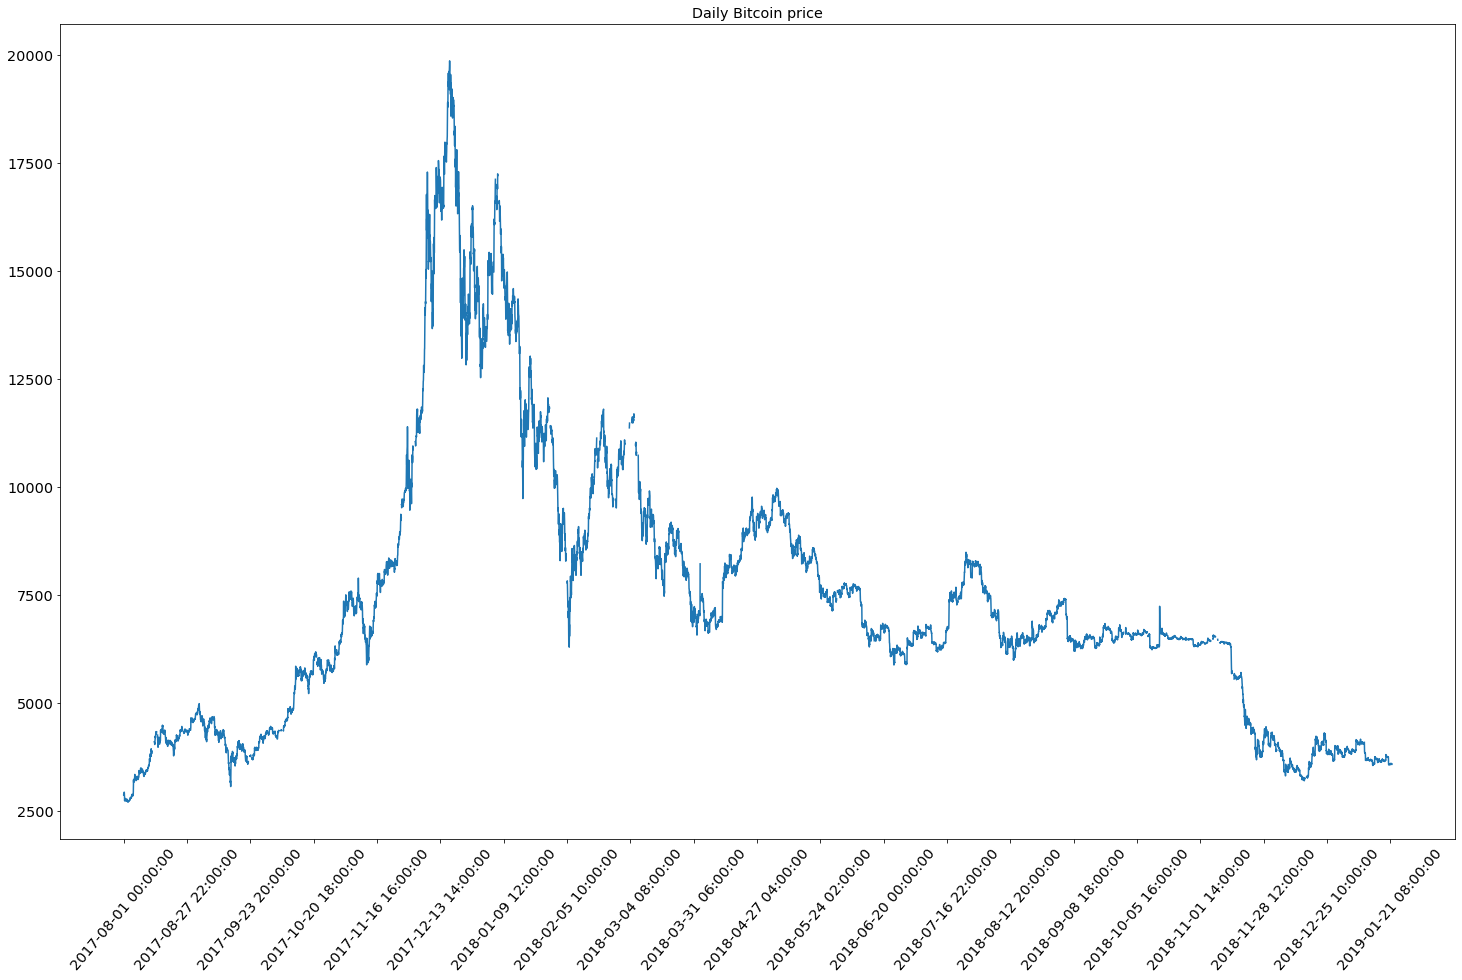

In [144]:
plt.plot(df['Date'], df['High'])
plt.title('Daily Bitcoin price')
plt.xticks(df['Date'][0:-1:step], rotation=50)
plt.show()

In [145]:
a = [1, 2, 3, 4, 5]
b = [1, 2]
for idx, val in enumerate(a):
    print(idx)

0
1
2
3
4


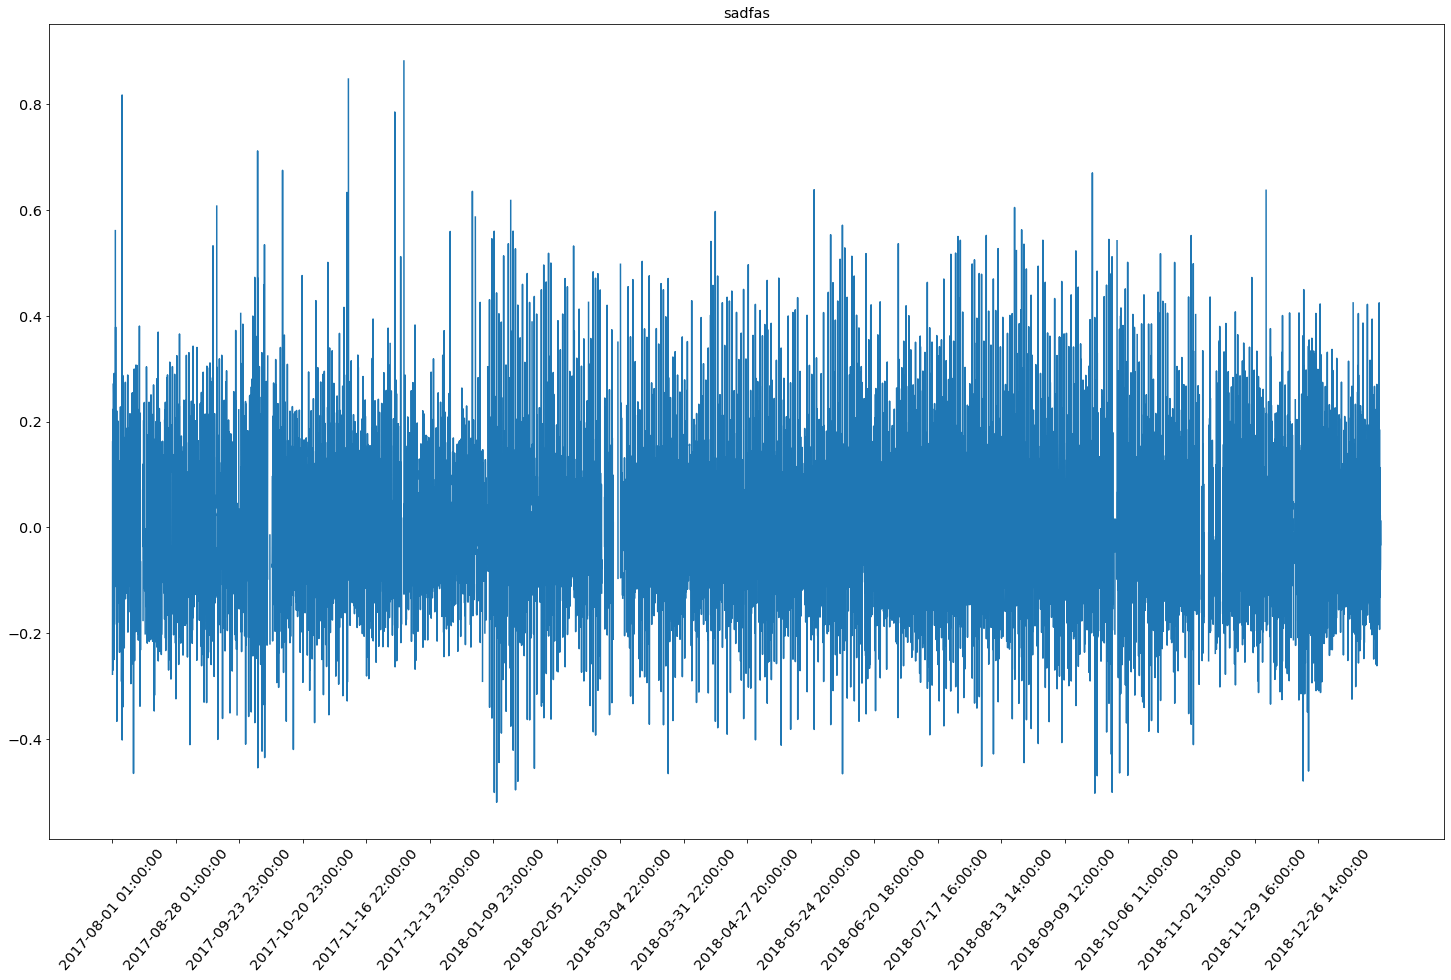

In [146]:
def detect_outlier(data_1, threshold):
    outliers = []
    
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for idx, val in enumerate(data_1):
        z_score= (val - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(idx)
    return outliers


tweets_log_diff = np.log(df['Total Volume of Tweets']).diff()
outliers = detect_outlier(tweets_log_diff, 5)

diff_df = df['Date']
for i in sorted(outliers, reverse=True):
    del diff_df[i]
    del tweets_log_diff[i]

plt.plot(diff_df, tweets_log_diff)
plt.title('sadfas')
plt.xticks(df['Date'][1:-1:step], rotation=50)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (7262,) and (12936,)

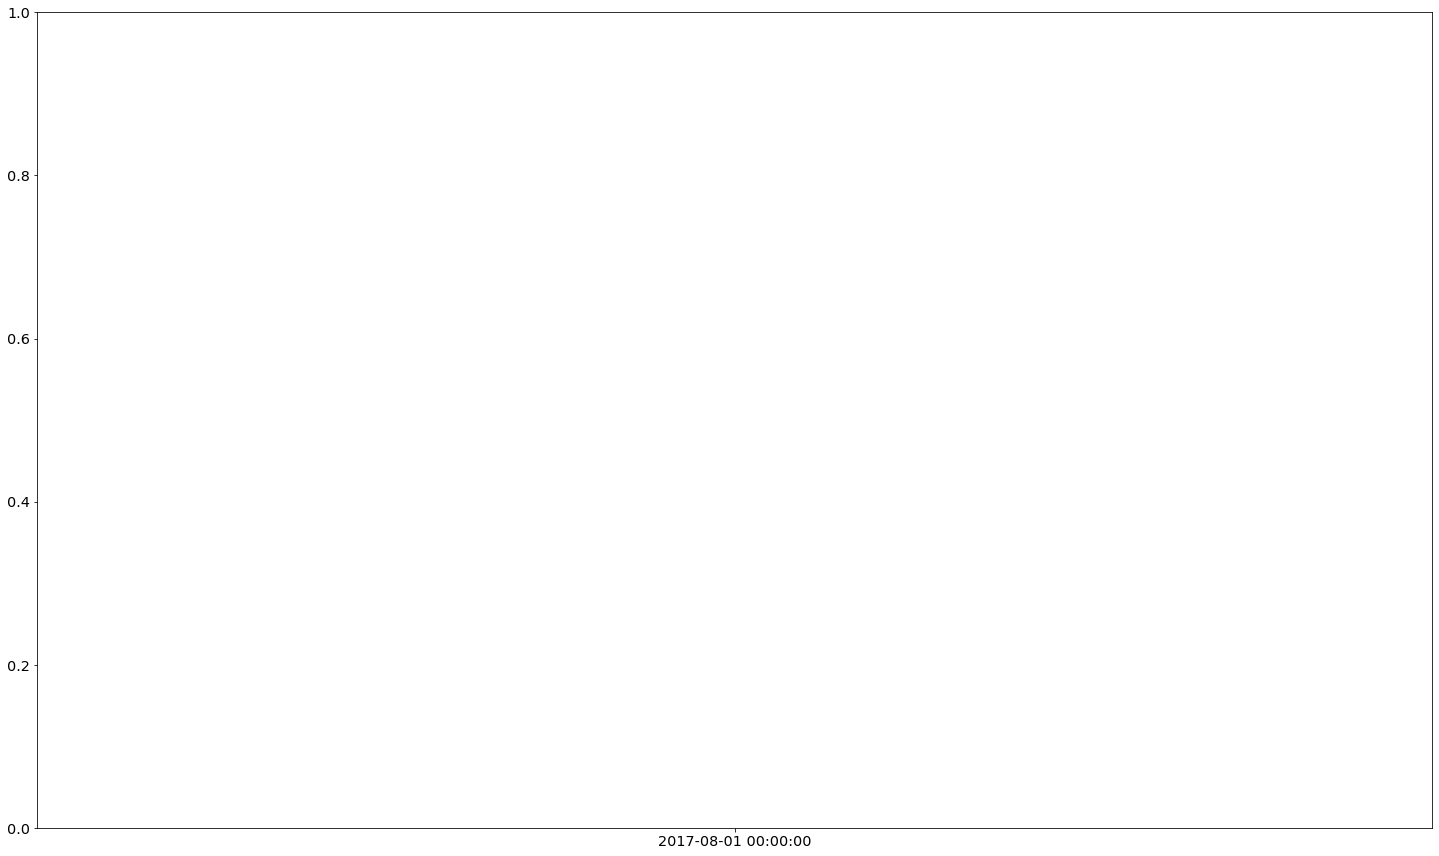

In [139]:
price_log_diff = np.log(df['High']).diff()
plt.plot(df['Date'], price_log_diff)
plt.title('sadfas')
plt.xticks(df['Date'][1:-1:step], rotation=50)
plt.show()